# Utility Bill Analysis

In this project I am looking at my utility bills from Nov. 2018 to July 2023 and trying to identify pattern in the data. 

### Data loading and cleaning

First, I will load the data into a pandas dataframe and then clean the data.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('JEA_Bill_Analysis.csv')
df.head()

,Date,Total_Bill,Electricity_Consumption (KWH),Electricity_Bill,Sewer_Bill,Water_Consumption (gal),Water_Bill
0,7/1/23,164.71,873,122.02,25.46,2000,17.23
1,6/1/23,135.47,692,99.73,19.99,1000,15.75
2,5/1/23,104.85,427,69.11,19.99,1000,15.75
3,4/1/23,107.53,450,71.79,19.99,1000,15.75
4,3/1/23,113.23,401,70.54,25.46,2000,17.23


In [127]:
# getting descriptive statistics of all the columns.
df.describe()

,Total_Bill,Electricity_Consumption (KWH),Electricity_Bill,Sewer_Bill,Water_Consumption (gal),Water_Bill
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,137.078000,703.709091,94.028545,25.442909,1963.636364,17.482182
std,37.491866,256.670467,31.230412,12.341188,2036.369649,5.134550
min,74.130000,312.000000,45.330000,14.520000,0.000000,14.280000
25%,114.080000,523.500000,71.480000,19.990000,1000.000000,15.750000
50%,123.580000,666.000000,87.330000,25.460000,2000.000000,17.230000
75%,157.730000,857.500000,112.165000,25.460000,2000.000000,17.230000
max,240.850000,1269.000000,155.040000,106.570000,15000.000000,53.390000


In [128]:
# Checking the data type of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           55 non-null     object 
 1   Total_Bill                     55 non-null     float64
 2   Electricity_Consumption (KWH)  55 non-null     int64  
 3   Electricity_Bill               55 non-null     float64
 4   Sewer_Bill                     55 non-null     float64
 5   Water_Consumption (gal)        55 non-null     int64  
 6   Water_Bill                     55 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.1+ KB


In [129]:
# Checking if there are any null values.
df.isnull().any()

Date                             False
Total_Bill                       False
Electricity_Consumption (KWH)    False
Electricity_Bill                 False
Sewer_Bill                       False
Water_Consumption (gal)          False
Water_Bill                       False
dtype: bool

In [130]:
# checking if there are any na values
df.isna().any()

Date                             False
Total_Bill                       False
Electricity_Consumption (KWH)    False
Electricity_Bill                 False
Sewer_Bill                       False
Water_Consumption (gal)          False
Water_Bill                       False
dtype: bool

In [131]:
# Converting date which is an object into pandas datetime.
df['Date'] = pd.to_datetime(df['Date'])

### Plotting total and electricity bill as a function of time.

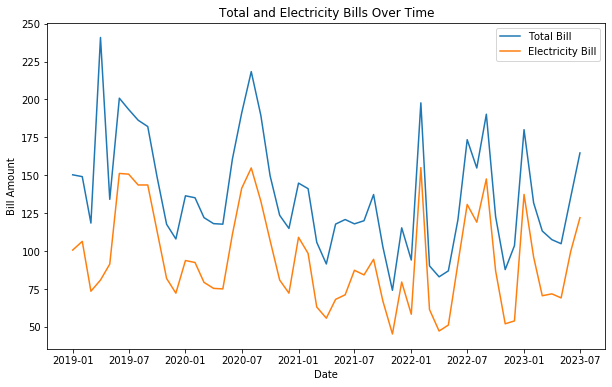

In [132]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the Total_Bill and Electricity_Bill against Date
plt.plot(df['Date'], df['Total_Bill'], label='Total Bill')
plt.plot(df['Date'], df['Electricity_Bill'], label='Electricity Bill')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Bill Amount')
plt.title('Total and Electricity Bills Over Time')
plt.legend()


There are definite spikes in the bill. In general, fall and spring months give lower bills as compared to winter and summer. We will confirm this later on. Also total bill is highly correlated to our electricity bill.

### Plotting average total bill for each month year over year.

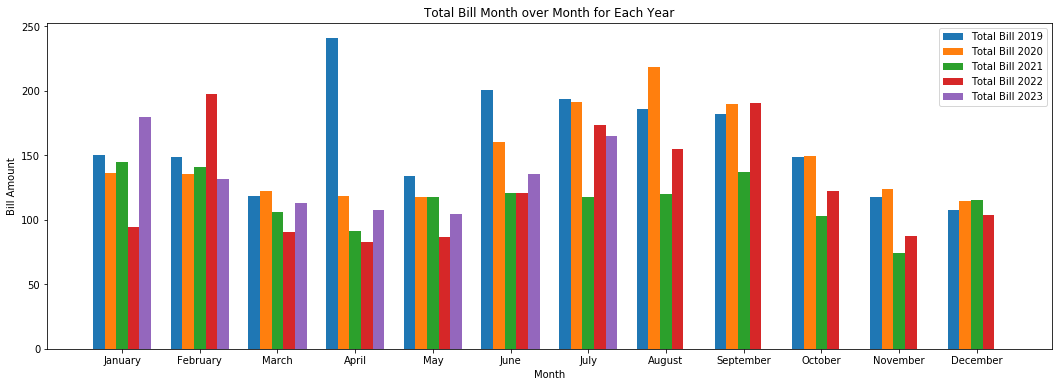

In [133]:
import numpy as np
import calendar

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group the data by Year and Month and calculate the total bill for each group
monthly_total_bills = df.groupby(['Year', 'Month'])['Total_Bill'].sum().reset_index()

# Create a single plot with one bar for each year
years = monthly_total_bills['Year'].unique()
num_months = 12

plt.figure(figsize=(18, 6))

# Position of the bars on the x-axis
bar_width = 0.15
r = np.arange(num_months)

for i, year in enumerate(years):
    # Filter data for the current year
    year_data_total = monthly_total_bills[monthly_total_bills['Year'] == year]
    
    # Make sure the data has 12 months for each year
    total_bill_values = year_data_total['Total_Bill'].values
    if len(total_bill_values) < num_months:
        total_bill_values = np.pad(total_bill_values, (0, num_months - len(total_bill_values)))
    
    # Plot the grouped bar chart
    plt.bar(r + i * bar_width, total_bill_values, width=bar_width, label=f'Total Bill {year}')
    
# Adjust the position of the xticks and set month names as labels
plt.xticks([r + (bar_width) * ((len(years) - 1) / 2) for r in range(num_months)], 
           [calendar.month_name[m] for m in range(1, num_months + 1)])

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Bill Amount')
plt.title('Total Bill Month over Month for Each Year')
plt.legend()



In general in March, May, November and December we have lower bills. While July, August, September have higher bills. The one huge spike in April 2019 was attributed to a water leak and therefore a huge water bill.

### Average bill year over year.

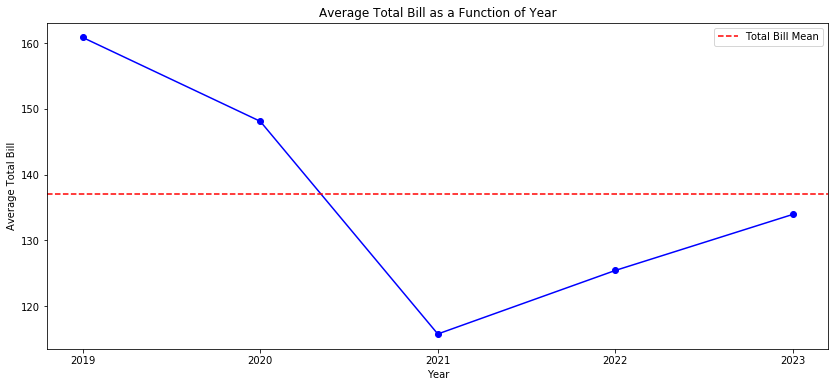

In [138]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Group the data by Month and calculate the average total bill for each month
yearly_avg_total_bills = df.groupby('Year')['Total_Bill'].mean()
plt.plot(yearly_avg_total_bills.index, yearly_avg_total_bills.values, marker='o', linestyle='-', color='blue')

overall_mean_total_bill = monthly_total_bills['Total_Bill'].mean()
# Plot horizontal lines for the mean
plt.axhline(y=overall_mean_total_bill, color='red', linestyle='dashed', label='Total Bill Mean')



# Customize the plot
plt.xlabel('Year')
plt.xticks(yearly_avg_total_bills.index)
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill as a Function of Year')
plt.legend()

We had a huge decline in bill in 2021 because we installed a new AC and ran it at 78 F during the summer. The bill has been climbing up since then because in 2022 we started running our AC at 75 for the whole day. In 2023, we now run our AC at 75 F during the day and 72 F during the night to get better sleep.

### Average Bill month over month.

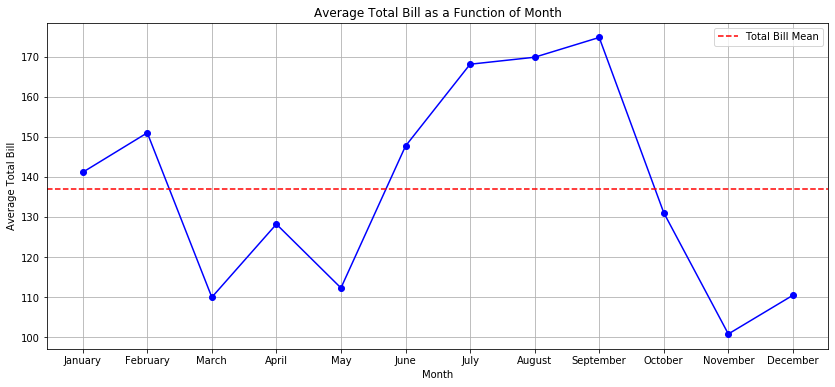

In [139]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Group the data by Month and calculate the average total bill for each month
monthly_avg_total_bills = df.groupby('Month')['Total_Bill'].mean()
plt.plot(monthly_avg_total_bills.index, monthly_avg_total_bills.values, marker='o', linestyle='-', color='blue')

overall_mean_total_bill = monthly_total_bills['Total_Bill'].mean()
# Plot horizontal lines for the mean
plt.axhline(y=overall_mean_total_bill, color='red', linestyle='dashed', label='Total Bill Mean')



# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill as a Function of Month')
plt.xticks(np.arange(1, 13), [calendar.month_name[i] for i in range(1, 13)])
plt.grid(True)
plt.legend()

### Percentage deviation from the mean total bill.

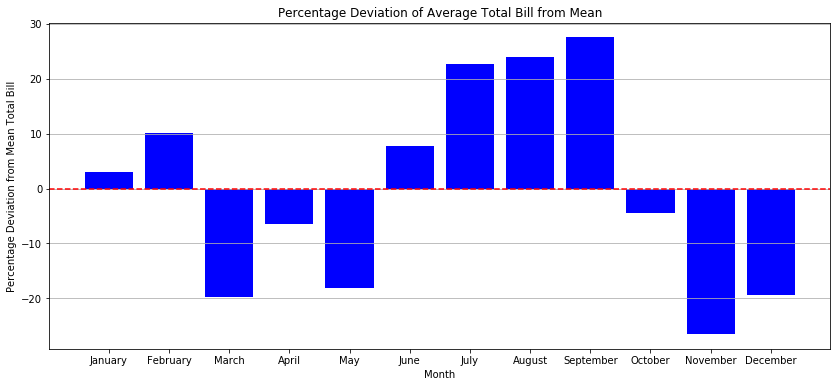

In [140]:
# Calculate the percentage deviation from the mean Total_Bill for each month
percentage_deviation = ((monthly_avg_total_bills - overall_mean_total_bill) / overall_mean_total_bill) * 100

# Create a bar plot for the percentage deviation
plt.figure(figsize=(14, 6))
plt.bar(percentage_deviation.index, percentage_deviation.values, color='blue')

# Add horizontal line at y=0 to indicate the mean Total_Bill
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Month')
plt.ylabel('Percentage Deviation from Mean Total Bill')
plt.title('Percentage Deviation of Average Total Bill from Mean')
plt.xticks(np.arange(1, 13), [calendar.month_name[i] for i in range(1, 13)])
plt.grid(axis='y')
plt.show()

### Bill for each season.

1. Dec, Jan, Feb: Winter
2. March, April, May: Spring
3. June, July, August, September: Summer (yes we live in FL)
4. October, November: Fall

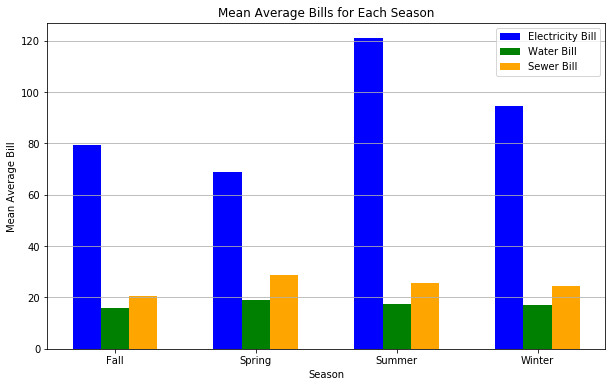

In [141]:
# Define seasons and map each month to its corresponding season
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Summer',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df['Season'] = df['Month'].map(seasons)

# Group the data by Season and calculate the mean total bill for each season
seasonly_avg_bills = df.groupby('Season').agg({
    'Electricity_Bill': 'mean',
    'Water_Bill': 'mean',
    'Sewer_Bill': 'mean'
}).reset_index()

# Create a bar plot for the mean average bills for each season
plt.figure(figsize=(10, 6))
bar_width = 0.2
r = np.arange(len(seasonly_avg_bills))

plt.bar(r, seasonly_avg_bills['Electricity_Bill'], width=bar_width, label='Electricity Bill', color='blue')
plt.bar(r + bar_width, seasonly_avg_bills['Water_Bill'], width=bar_width, label='Water Bill', color='green')
plt.bar(r + bar_width * 2, seasonly_avg_bills['Sewer_Bill'], width=bar_width, label='Sewer Bill', color='orange')

plt.xlabel('Season')
plt.ylabel('Mean Average Bill')
plt.title('Mean Average Bills for Each Season')
plt.xticks(r + bar_width, seasonly_avg_bills['Season'])
plt.legend()
plt.grid(axis='y')
plt.show()


As is clear from the plot, our lowest bill comes in Spring and then Fall followed by Winter and Summer.

### Predicting our future bill based on ARIMA.


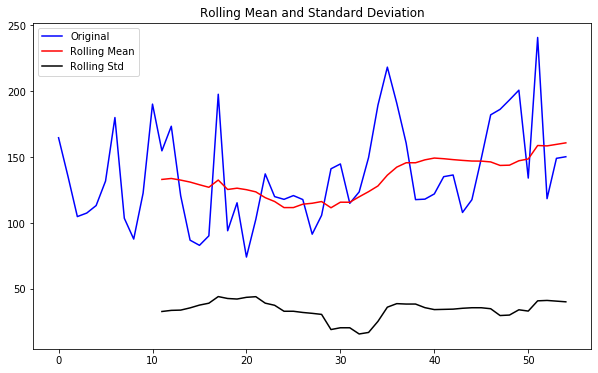

Results of dickey fuller test
Test Statistics                -4.865042
p-value                         0.000041
No. of lags used                0.000000
Number of observations used    54.000000
critical value (1%)            -3.557709
critical value (5%)            -2.916770
critical value (10%)           -2.596222
dtype: float64


In [142]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Total_Bill'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x432 with 0 Axes>

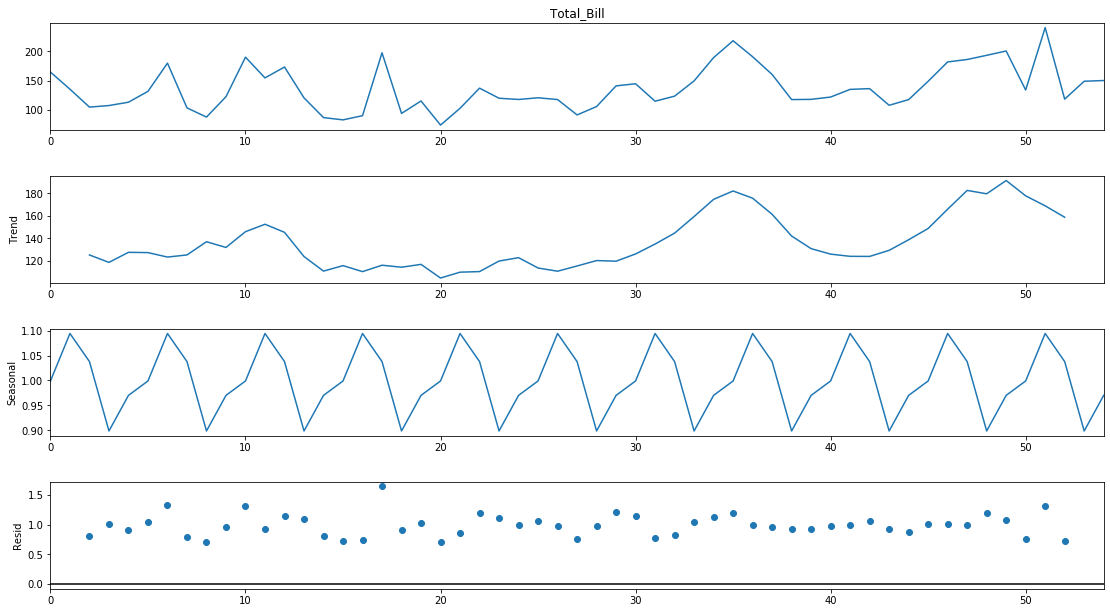

In [143]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df['Total_Bill'], model='multiplicative', freq = 5)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


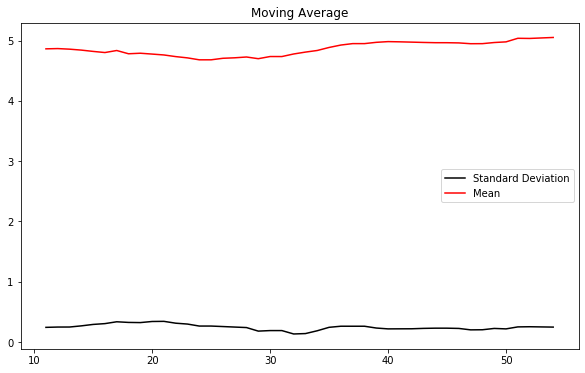

In [144]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Total_Bill'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

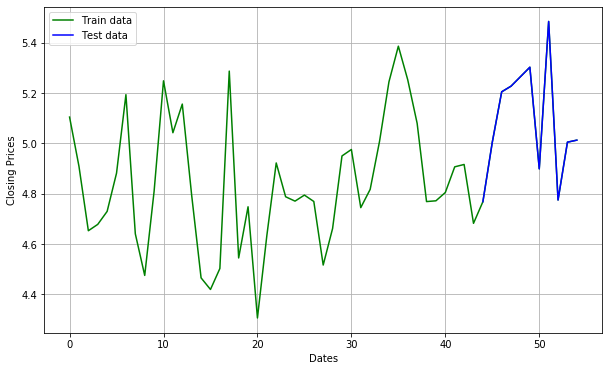

In [145]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Squared Error (MSE): 674.3389198617451


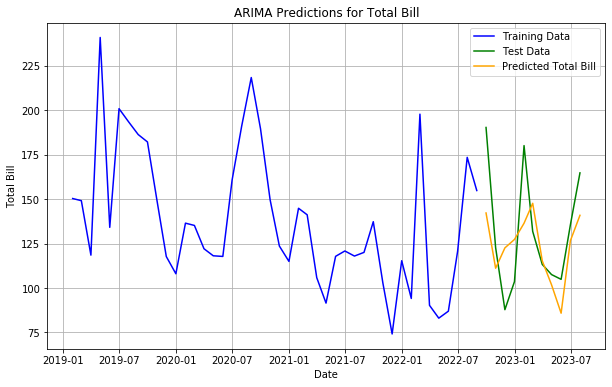

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the CSV file into a Pandas DataFrame
# Replace 'your_csv_file.csv' with the actual path to your CSV file
df = pd.read_csv('JEA_Bill_Analysis.csv')

# Convert the 'Date' column to pandas datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the 'Date' and 'Total_Bill' columns and set 'Date' as the index
data = df[['Date', 'Total_Bill']].set_index('Date')

# Resample the data to monthly frequency and calculate the total bill for each month
monthly_total_bills = data.resample('M').sum()

# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_total_bills, test_size=0.2, shuffle=False)

# Fit ARIMA model to the training data
# Replace (p, d, q) with appropriate values based on your data and analysis
p, d, q = 21, 1, 0
model = ARIMA(train_data, order=(p, d, q))
arima_results = model.fit()

# Make predictions on the test set
# Specify the number of steps (months) to forecast
forecast_horizon = len(test_data)
predictions = arima_results.forecast(steps=forecast_horizon)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(test_data, predictions)

print("Mean Squared Error (MSE):", mse)

# Create a new DataFrame with the predicted values and index for plotting
predicted_data = pd.DataFrame({'Predicted_Total_Bill': predictions}, index=test_data.index)

# Plot the original data along with the predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Test Data', color='green')
plt.plot(predicted_data, label='Predicted Total Bill', color='orange')
plt.xlabel('Date')
plt.ylabel('Total Bill')
plt.title('ARIMA Predictions for Total Bill')
plt.legend()
plt.grid(True)
plt.show()
